In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [142]:
data = pd.read_csv("Heart.csv")
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [144]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [145]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


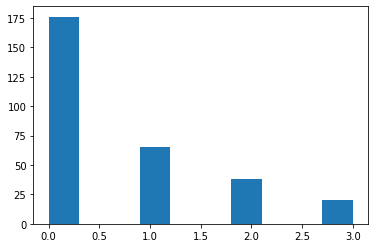

In [146]:
plt.hist(data["Ca"]);

In [147]:
data["Thal"].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [148]:
y = data["AHD"]
data.drop("AHD", inplace = True, axis =1)

In [149]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])

In [150]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ChestPain  303 non-null    object
 1   Thal       301 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [151]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      303 non-null    int64  
 1   Sex      303 non-null    int64  
 2   RestBP   303 non-null    int64  
 3   Chol     303 non-null    int64  
 4   Fbs      303 non-null    int64  
 5   RestECG  303 non-null    int64  
 6   MaxHR    303 non-null    int64  
 7   ExAng    303 non-null    int64  
 8   Oldpeak  303 non-null    float64
 9   Slope    303 non-null    int64  
 10  Ca       299 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 26.2 KB


In [152]:
num_si = SimpleImputer(strategy='mean')

In [153]:
num_si.fit(numeric_data)

SimpleImputer()

In [154]:
imp_num_data = pd.DataFrame(num_si.transform(numeric_data), columns = numeric_data.columns)
imp_num_data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0


In [155]:
cat_si = SimpleImputer(strategy='most_frequent')
cat_si.fit(cat_data)
imp_cat_data = pd.DataFrame(cat_si.transform(cat_data), columns = cat_data.columns)
imp_cat_data.head()

,ChestPain,Thal
0,typical,fixed
1,asymptomatic,normal
2,asymptomatic,reversable
3,nonanginal,normal
4,nontypical,normal


In [156]:
scaler = StandardScaler()

In [157]:
scaler.fit(imp_num_data)

StandardScaler()

In [158]:
imp_sca_num_data = pd.DataFrame(scaler.transform(imp_num_data), columns = imp_num_data.columns)

In [159]:
imp_sca_num_data

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,0.948726,0.686202,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095
1,1.392002,0.686202,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095
...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.723095
299,1.502821,0.686202,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.428203
300,0.283813,0.686202,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.352554
301,0.283813,-1.457296,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.352554


In [160]:
imp_sca_num_data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-1.538923e-17,2.931282e-18,4.259519e-16,2.418308e-16,-1.135872e-17,6.954466e-16,-1.179841e-16,-4.470205e-17,-1.700144e-16,2.334033e-16,3.444256e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.819115e+00,-1.457296e+00,-2.145037e+00,-2.334877e+00,-4.176345e-01,-9.967493e-01,-3.442067e+00,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.230950e-01
25%,-7.135564e-01,-1.457296e+00,-6.652997e-01,-6.905030e-01,-4.176345e-01,-9.967493e-01,-7.053073e-01,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.230950e-01
50%,1.729945e-01,6.862024e-01,-9.616980e-02,-1.101357e-01,-4.176345e-01,9.967493e-03,1.485618e-01,-6.966305e-01,-2.067053e-01,6.491132e-01,-7.230950e-01
75%,7.270888e-01,6.862024e-01,4.729601e-01,5.476139e-01,-4.176345e-01,1.016684e+00,7.178079e-01,1.435481e+00,4.834512e-01,6.491132e-01,3.525538e-01
max,2.500191e+00,6.862024e-01,3.887739e+00,6.138485e+00,2.394438e+00,1.016684e+00,2.294182e+00,1.435481e+00,4.451851e+00,2.274579e+00,2.503851e+00


In [106]:
ohe = OneHotEncoder(drop= "first", sparse = False)

In [107]:
ohe.fit(imp_cat_data)

OneHotEncoder(drop='first', sparse=False)

In [108]:
col_names = ohe.get_feature_names(["ChestPain", "Thal"])
col_names

array(['ChestPain_nonanginal', 'ChestPain_nontypical',
       'ChestPain_typical', 'Thal_normal', 'Thal_reversable'],
      dtype=object)

In [109]:
imp_ohe_cat_data = pd.DataFrame(ohe.transform(imp_cat_data), columns = col_names)

In [110]:
imp_ohe_cat_data.head()

,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0


In [111]:
clean_data = pd.concat([imp_sca_num_data, imp_ohe_cat_data], axis = 1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    float64
 1   Sex                   303 non-null    float64
 2   RestBP                303 non-null    float64
 3   Chol                  303 non-null    float64
 4   Fbs                   303 non-null    float64
 5   RestECG               303 non-null    float64
 6   MaxHR                 303 non-null    float64
 7   ExAng                 303 non-null    float64
 8   Oldpeak               303 non-null    float64
 9   Slope                 303 non-null    float64
 10  Ca                    303 non-null    float64
 11  ChestPain_nonanginal  303 non-null    float64
 12  ChestPain_nontypical  303 non-null    float64
 13  ChestPain_typical     303 non-null    float64
 14  Thal_normal           303 non-null    float64
 15  Thal_reversable       3

In [118]:
X_train, X_test, y_train, y_test = train_test_split(clean_data, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 16)
(61, 16)
(242,)
(61,)


In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 248 to 25
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   242 non-null    float64
 1   Sex                   242 non-null    float64
 2   RestBP                242 non-null    float64
 3   Chol                  242 non-null    float64
 4   Fbs                   242 non-null    float64
 5   RestECG               242 non-null    float64
 6   MaxHR                 242 non-null    float64
 7   ExAng                 242 non-null    float64
 8   Oldpeak               242 non-null    float64
 9   Slope                 242 non-null    float64
 10  Ca                    242 non-null    float64
 11  ChestPain_nonanginal  242 non-null    float64
 12  ChestPain_nontypical  242 non-null    float64
 13  ChestPain_typical     242 non-null    float64
 14  Thal_normal           242 non-null    float64
 15  Thal_reversable       

In [120]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

SVC(kernel='linear')

In [122]:
train_pred = svc.predict(X_train)
train_pred[:10]

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [123]:
confusion_matrix(y_train, train_pred)

array([[122,  11],
       [ 21,  88]], dtype=int64)

In [125]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88       133
         Yes       0.89      0.81      0.85       109

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.87       242
weighted avg       0.87      0.87      0.87       242



In [126]:
test_pred = svc.predict(X_test)
test_pred[:10]

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [127]:
confusion_matrix(y_test, test_pred)

array([[28,  3],
       [ 7, 23]], dtype=int64)

In [128]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.80      0.90      0.85        31
         Yes       0.88      0.77      0.82        30

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

